In [34]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

# Exercise

# Getting the data

In [35]:
from sklearn.datasets import load_boston
data = load_boston()

The keys of the object are:

In [36]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Let's get a bit acquainted with the data

In [37]:
print(data['DESCR'][:1300])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In this exercise we will stick to the original target variable. Thus, the first task is to divide the data into a training set and a test set. Remember, the latter represents our future unseen examples

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)
print("Number of data points in training set and test set, respectively: {} and {}".format(X_train.shape[0], 
                                                                                          X_test.shape[0]))

Number of data points in training set and test set, respectively: 379 and 127


# A first k-NN attempt at a model

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

Learn the model, which is this case simply means storing the training data

In [40]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [41]:
print("Model score on test set: {}".format(knn.score(X_test, y_test)))

Model score on test set: 0.4616380924610112


*Note again:* Accruracy is measured by the R^2 coefficient defined as (1 - u/v), where 
 * u is the residual sum of squares ((y_true - y_pred)^2).sum() 
 * v is the total sum of squares ((y_true - y_true.mean())^2).sum().
 
 The values are between 0 and 1, where higher is better.

### *Exercise:* 
* Calculate the performance of the model on the training data
* Try adusting the number of neighbors and see what impact is has on the two scores

In [42]:
print("Test set predictions: {}".format(knn.predict(X_train)))

Test set predictions: [ 19.68  25.64  30.72  13.54  11.2   14.86  22.02  11.66  39.82  28.92
  17.16  25.4   10.18  10.38  21.82  38.56  27.82  21.8   16.78  33.06
  27.26  13.44  11.04  22.9   27.26  14.76  31.74  17.86  25.34  19.04
  17.28  20.8   16.82  10.56  21.    32.58  29.66  31.74  22.5   23.56
  22.7   33.44  11.74  31.8   15.36  19.82  21.7   22.5   10.94  19.96
  19.96  23.66  24.    14.78   9.96  25.74  23.26  19.56  24.98  24.06
  33.32  37.84  13.44   9.36  37.9   25.04  22.1   32.42  26.84  24.44
  17.56  23.18  36.62  26.34  15.12  41.88  23.44  18.26  27.26  39.16
  25.4   22.96  19.12  25.98  28.66  12.24  23.88  19.12  10.68  15.24
  19.96  15.58  25.98  13.44  17.28  20.4   18.26  22.74  19.06  14.1   20.1
  22.98  19.56  13.58  22.9   23.    25.4   20.2   22.02  14.86  22.76
  41.88  18.72  28.86  25.42  20.38  15.86  32.88  32.88  38.56  19.04
  31.68  15.12  10.18  11.74  12.94  31.5   17.04  14.1   22.52  20.74
  33.6   30.28  28.82  22.62  22.68  28.04  24.34

In [43]:
print("Accuracy (R^2) on test set: {} ".format(knn.score(X_train, y_train)))

Accuracy (R^2) on test set: 0.7061990439169894 


# A second k-NN attempt at a model

Let's first take a slightly closer look at our data.

In [9]:
data_df = pd.DataFrame(X_train, columns=data['feature_names'])
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.386351,11.861478,11.083509,0.065963,0.556160,6.312683,68.735620,3.781929,9.411609,403.226913,18.489710,358.808232,12.546280
std,8.250942,23.810122,7.021496,0.248546,0.116179,0.693391,28.214667,2.094931,8.676092,171.319579,2.191971,89.169412,7.202756
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.075200,0.000000,5.040000,0.000000,0.449000,5.904500,45.250000,2.100350,4.000000,276.000000,17.400000,376.125000,6.700000
50%,0.263630,0.000000,8.560000,0.000000,0.538000,6.229000,78.100000,3.215700,5.000000,329.000000,19.100000,391.930000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.631000,6.676000,93.800000,5.116700,24.000000,666.000000,20.200000,395.960000,17.030000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


A box plot can also provide a quick overview:

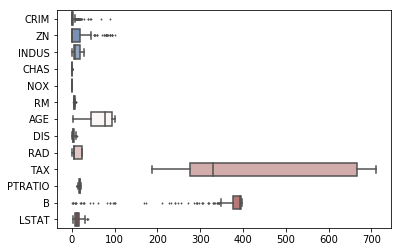

In [10]:
sns.boxplot(data=data_df, palette="vlag", orient='h',fliersize=1)

From the table and the plot we can see some potential issues with the data. Specifically, the scales of some of the features vary quite a lot. For example, the mean of 'CRIM' is 3.386351 but for 'TAX' it is 403.226913. As we saw on the slides, standard distance measures can have a hard time dealing with this. Thus, we resort to normalization (in this case Z-score): 

$$ \mathit{normalized(F)} = \frac{F-\mathit{mean}(F)}{\mathit{std}(F)}$$

Note that below:
* we only use data from the training set when performing the normalization
* the suffix '_n' added to the variables indicates that the features have been normalized.

In [11]:
X_train_n = (X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_n = (X_test-X_train.mean(axis=0))/X_train.std(axis=0)

The result of the normalization

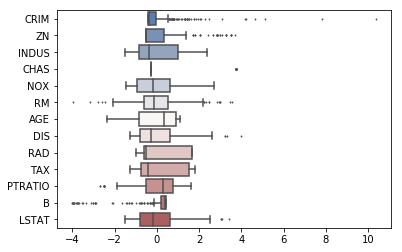

In [12]:
sns.boxplot(data=pd.DataFrame(X_train_n, columns=data['feature_names']), palette="vlag", orient='h',fliersize=1)

Now fit the model to the transformed dataset and score the test set

In [13]:
knn.fit(X_train_n, y_train)
print("Model score on Z-score normalized test set: {}".format(knn.score(X_test_n, y_test)))

Model score on Z-score normalized test set: 0.6064585425673015


### *Exercise*: 
* Try making a min-max normalization of the data:
$$ \mathit{normalized(F)} = \frac{F-\mathit{min}(F)}{\mathit{max}(F)-\mathit{min}(F)}$$
* Make a boxplot of the normalized data and compare with the plot obtained from Z-score normalization
* Learn a kNN model and fit it to the new data. Is there a difference in score compared to what was achived using Z-score normalization? Why could that be the case?

# A third kNN model

The data analysis so far has only focused on the individual variables. Let's now look at the interaction between the variables.

In [ ]:
sns.pairplot(data_df.iloc[:, [2,4,5,10,12]])

The covariance matrix captures some of the variability in the data. We can see this by plotting it as a heatmap

In [ ]:
train_cov = np.cov(X_train_n, rowvar=False)
sns.heatmap(train_cov, 
        xticklabels=data['feature_names'],
        yticklabels=data['feature_names'])


The joint variability of the variables is not reflected in the Euclidean distance measure used so far (c.f. Slide 7). We may try to account for this variability using the Mahalanobis distance measure.

In [ ]:
# We need to supply the Mahalanobis distance with the data covariance matrix  
knn = KNeighborsRegressor(n_neighbors=5, metric="mahalanobis", metric_params={'V': train_cov})

### *Exercise:*
* Fit the newly specified model (that relies on the Mahalanobis distance) using both the original data and the normalized data
* Evaluate the models with different number of neighbors and compare to the results previously obtained